<a href="https://colab.research.google.com/github/SimaranPatel/Customer-Churn-Analysis-and-Prediction-Using-Machine-Learning/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CUSTOMER CHURN ANALYSIS & PREDICTION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
df=pd.read_csv('/content/ecommerce_customer_data_custom_ratios.csv')

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,08-09-2020,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,05-03-2022,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,23-05-2022,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,12-11-2020,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,27-11-2020,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


#Preprocessing

In [ ]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [ ]:
df.dtypes

,0
Customer ID,int64
Purchase Date,object
Product Category,object
Product Price,int64
Quantity,int64
Total Purchase Amount,int64
Payment Method,object
Customer Age,int64
Returns,float64
Customer Name,object


In [ ]:
df.shape

(250000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47596
Customer Name,0


In [ ]:
df["Returns"]

,Returns
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
249995,1.0
249996,1.0
249997,0.0
249998,0.0


In [ ]:
df.shape

(250000, 13)

In [ ]:
missing_percentage = df['Returns'].isnull().mean() * 100
print(f"Missing values in 'Returns': {missing_percentage:.2f}%")


Missing values in 'Returns': 19.04%


In [ ]:
df['Returns'].fillna(df['Returns'].mode()[0], inplace=True)

In [ ]:
#df.to_csv('preprocessed_churn_analysis.csv', index=False)

In [ ]:
df.isna().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,0
Customer Name,0


In [ ]:
#df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')
#df['Purchase Date'] = df['Purchase Date'].dt.date

In [ ]:
#df['Purchase Date'].dtype

In [ ]:
#df['Purchase Date'].info()

In [ ]:
df.drop('Customer Name', axis=1, inplace=True)

In [ ]:
df_obj=df.select_dtypes(include=['object'])
print(df_obj.shape)
df_obj.columns

(250000, 4)


Index(['Purchase Date', 'Product Category', 'Payment Method', 'Gender'], dtype='object')

In [ ]:
df_obj.drop('Purchase Date', axis=1, inplace=True)

In [ ]:
df_ohe=pd.get_dummies(df_obj)

In [ ]:
print(df_ohe.shape)
df_ohe.columns

(250000, 10)


Index(['Product Category_Books', 'Product Category_Clothing',
       'Product Category_Electronics', 'Product Category_Home',
       'Payment Method_Cash', 'Payment Method_Credit Card',
       'Payment Method_Crypto', 'Payment Method_PayPal', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [ ]:
df_num=df[["Customer ID","Purchase Date","Product Price","Quantity","Total Purchase Amount","Customer Age","Returns","Churn"]]


In [ ]:
df_num.columns

Index(['Customer ID', 'Purchase Date', 'Product Price', 'Quantity',
       'Total Purchase Amount', 'Customer Age', 'Returns', 'Churn'],
      dtype='object')

In [ ]:
df_final = df_num.join(df_ohe)


In [ ]:
df_final.columns

Index(['Customer ID', 'Purchase Date', 'Product Price', 'Quantity',
       'Total Purchase Amount', 'Customer Age', 'Returns', 'Churn',
       'Product Category_Books', 'Product Category_Clothing',
       'Product Category_Electronics', 'Product Category_Home',
       'Payment Method_Cash', 'Payment Method_Credit Card',
       'Payment Method_Crypto', 'Payment Method_PayPal', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [ ]:
df_final.shape

(250000, 18)

In [ ]:
df1=df_final.drop('Purchase Date', axis=1)

In [ ]:
df1.skew()

,0
Customer ID,-0.001959
Product Price,0.001450
Quantity,0.000714
Total Purchase Amount,0.000352
Customer Age,0.003668
Returns,0.395195
Churn,1.503952
Product Category_Books,0.874707
Product Category_Clothing,0.871796
Product Category_Electronics,1.494240


In [ ]:
df1.kurt()

,0
Customer ID,-1.199594
Product Price,-1.198299
Quantity,-1.301121
Total Purchase Amount,-1.193736
Customer Age,-1.203710
Returns,-1.843836
Churn,0.261874
Product Category_Books,-1.234898
Product Category_Clothing,-1.239981
Product Category_Electronics,0.232754


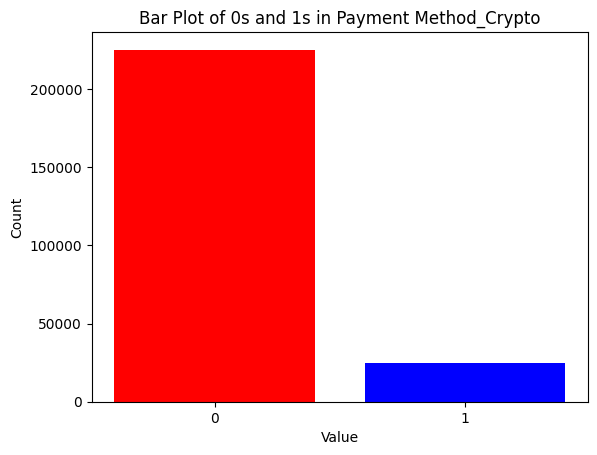

In [ ]:
counts = df_final["Payment Method_Crypto"].value_counts()
plt.bar(counts.index, counts.values, color=["red", "blue"])
plt.xticks([0, 1], ["0", "1"])
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Bar Plot of 0s and 1s in Payment Method_Crypto")
plt.show()

In [ ]:
df_final.drop('Payment Method_Crypto', axis=1, inplace=True)

In [ ]:
#df_final.to_csv('preprocessed_churn_analysis.csv', index=False)

In [ ]:
print(df['Churn'].value_counts())

Churn
0    200126
1     49874
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
X = df_final.drop(columns=['Churn'])
X.drop('Purchase Date', axis=1, inplace=True)
y = df_final['Churn']

In [ ]:
X.shape, y.shape

((250000, 15), (250000,))

In [ ]:
X.columns

Index(['Customer ID', 'Product Price', 'Quantity', 'Total Purchase Amount',
       'Customer Age', 'Returns', 'Product Category_Books',
       'Product Category_Clothing', 'Product Category_Electronics',
       'Product Category_Home', 'Payment Method_Cash',
       'Payment Method_Credit Card', 'Payment Method_PayPal', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [ ]:
y.isna().sum()

0

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=7)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Churn'] = y_resampled

In [ ]:
print(df_resampled['Churn'].value_counts())

Churn
0    200126
1    200126
Name: count, dtype: int64


In [ ]:
df_resampled.shape

(400252, 16)

In [ ]:
df_resampled.head()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal,Gender_Female,Gender_Male,Churn
0,46251,12,3,740,37,0.0,False,False,True,False,False,True,False,False,True,0
1,46251,468,4,2739,37,0.0,False,False,False,True,False,False,True,False,True,0
2,46251,288,2,3196,37,0.0,False,False,False,True,False,False,True,False,True,0
3,46251,196,1,3509,37,0.0,False,True,False,False,False,False,True,False,True,0
4,13593,449,1,3452,49,0.0,False,False,False,True,False,True,False,True,False,1


In [ ]:
df_resampled.columns

Index(['Customer ID', 'Product Price', 'Quantity', 'Total Purchase Amount',
       'Customer Age', 'Returns', 'Product Category_Books',
       'Product Category_Clothing', 'Product Category_Electronics',
       'Product Category_Home', 'Payment Method_Cash',
       'Payment Method_Credit Card', 'Payment Method_PayPal', 'Gender_Female',
       'Gender_Male', 'Churn'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,y_resampled,
                                                 test_size=0.3,
                                                 random_state=7)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((280176, 15), (120076, 15), (280176,), (120076,))

In [ ]:
X_train.columns

Index(['Customer ID', 'Product Price', 'Quantity', 'Total Purchase Amount',
       'Customer Age', 'Returns', 'Product Category_Books',
       'Product Category_Clothing', 'Product Category_Electronics',
       'Product Category_Home', 'Payment Method_Cash',
       'Payment Method_Credit Card', 'Payment Method_PayPal', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [ ]:
X_test.columns

Index(['Customer ID', 'Product Price', 'Quantity', 'Total Purchase Amount',
       'Customer Age', 'Returns', 'Product Category_Books',
       'Product Category_Clothing', 'Product Category_Electronics',
       'Product Category_Home', 'Payment Method_Cash',
       'Payment Method_Credit Card', 'Payment Method_PayPal', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

print("Scaled X_train mean:", X_train_scaled.mean(axis=0))
print("Scaled X_train std:", X_train_scaled.std(axis=0))


Scaled X_train mean: [ 4.75003763e-17  7.09335572e-17 -7.12061835e-17  1.02659649e-16
 -9.87541193e-17 -9.92866916e-18 -1.31082525e-16 -3.28673186e-17
  3.47693625e-17  5.96734573e-17 -5.74163652e-17  1.74988039e-17
  4.04754942e-17 -9.31494299e-17 -2.33063779e-17]
Scaled X_train std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(criterion ="gini", random_state=7, class_weight="balanced")
dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     60312
           1       0.92      0.99      0.95     59764

    accuracy                           0.95    120076
   macro avg       0.96      0.95      0.95    120076
weighted avg       0.96      0.95      0.95    120076



In [ ]:
confusion_matrix(Y_test,y_pred)

array([[55527,  4785],
       [  818, 58946]])

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=60 ,max_samples = 0.8, oob_score = True,random_state=7)
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.92      0.94     60312
           1       0.92      0.95      0.94     59764

    accuracy                           0.94    120076
   macro avg       0.94      0.94      0.94    120076
weighted avg       0.94      0.94      0.94    120076



In [ ]:
confusion_matrix(Y_test,y_pred)

array([[55641,  4671],
       [ 3049, 56715]])

# Grid Search

In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid={
 #   "n_estimators" : [40,50,60],
 #   "max_samples" : [0.7,0.8,0.9]
#}


In [ ]:
#gscv = GridSearchCV(RandomForestClassifier(random_state=7), param_grid, cv=2, verbose=2)

In [ ]:
#gscv.fit(X_train,Y_train)

In [ ]:
#gscv.best_score_

In [ ]:
#gscv.best_params_

# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(class_weight="balanced", random_state=7)
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51     60312
           1       0.50      0.49      0.49     59764

    accuracy                           0.50    120076
   macro avg       0.50      0.50      0.50    120076
weighted avg       0.50      0.50      0.50    120076



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**PICKLING**

In [ ]:
import pickle

In [ ]:
filename = 'model.pkl'

In [ ]:
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
load_model = pickle.load(open(filename, 'rb'))

In [ ]:
model_score_r1 = load_model.score(X_test, Y_test)

In [ ]:
model_score_r1

In [ ]:
import bz2

with open("model.pkl", "rb") as input_file, bz2.open("model.pkl.bz2", "wb") as output_file:
    output_file.writelines(input_file)
